# 住宅情報の分析

アイオワ州エイムズ市の住宅価格データセットを使い、基本的なデータの扱い方を学んでいきます。


住宅に関する79種類もの説明変数が用意されているため、それらと価格との関係を探索していきましょう。


エイムズがどのような街なのかもWikipediaなどで確認しておくと良いでしょう。


Kaggleでは「Notebooks」としていろいろな人がデータ探索（EDA）を行ったコードが共有されています。良いEDAをたくさん見て、ノウハウを吸収していきましょう。今回の課題をやる上でも参考にしたり、課題になっていないことに挑戦したりしてください。


これ以降Kaggleを利用していきますので、アカウントを作成してください。


《参考Notebooks》


Comprehensive data exploration with Python | Kaggle（まずはここから）


House Prices : EDA to ML (Beginner) | Kaggle


A Home for Pandas and Sklearn: Beginner How-Tos | Kaggle

## 【問題1】データセットの取得
pd.read_csv()を使用して、変数に格納してください。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("train.csv")
np.set_printoptions(suppress=True)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 【問題2】データセット自体の調査
KaggleのOverviewページや、Dataページの「Data fields」などを読みながら、どのようなデータセットかを説明してください。

### 解答
### ファイルの説明
train.csv-トレーニングセット
test.csv-テストセット
data_description.txt-各列の完全な説明。元々はDeanDe Cockによって作成されましたが、ここで使用されている列名と一致するように少し編集されています。
sample_submission.csv-販売年月、ロット平方フィート、寝室数の線形回帰からのベンチマーク提出
### データフィールド
これは、データ記述ファイルにあるものの簡単なバージョンです。

SalePrice-プロパティのドルでの販売価格。これは、予測しようとしているターゲット変数です。  
MSSubClass：建物クラス  
MSZoning：一般的なゾーニング分類  
LotFrontage：プロパティに接続された通りの直線フィート  
LotArea：平方フィート単位のロットサイズ  
通り：道路アクセスのタイプ  
路地：路地へのアクセスの種類  
LotShape：プロパティの一般的な形状  
LandContour：プロパティの平坦度  
ユーティリティ：利用可能なユーティリティの種類  
LotConfig：ロット構成  
LandSlope：プロパティの勾配  
近隣：エイムズ市域内の物理的な場所  
条件1：幹線道路または鉄道への近さ  
条件2：幹線道路または鉄道への近接性（秒が存在する場合)  
BldgType：住居のタイプ  
HouseStyle：住居のスタイル  
OverallQual：総合素材と仕上がりの品質  
OverallCond：総合状態評価  
YearBuilt：元の建設日  
YearRemodAdd：改造日  
RoofStyle：屋根のタイプ  
RoofMatl：屋根材  
Exterior1st：家の外装カバー  
Exterior2nd：家の外装カバー（複数の素材の場合)  
MasVnrType：組積造ベニヤタイプ  
MasVnrArea：平方フィート単位の組積造ベニヤ面積  
ExterQual：外装素材の品質  
ExterCond：外装の素材の現状  
基礎：基礎の種類  
BsmtQual：地下室の高さ  
BsmtCond：地下室の一般的な状態  
BsmtExposure：ストライキまたはガーデンレベルの地下壁  
BsmtFinType1：地下室の仕上げエリアの品質  
BsmtFinSF1：タイプ1の完成した平方フィート  
BsmtFinType2：2番目に完成した領域の品質（存在する場合）  
BsmtFinSF2：タイプ2の完成した平方フィート  
BsmtUnfSF：地下室の未完成の平方フィート  
TotalBsmtSF：地下室の総平方フィート  
暖房：暖房の種類  
HeatingQC：加熱の品質と状態  
CentralAir：セントラルエアコン  
電気：電気システム  
1stFlrSF：1階平方フィート  
2ndFlrSF：2階の平方フィート  
LowQualFinSF：低品質の完成した平方フィート（すべてのフロア）  
GrLivArea：地上（地上）のリビングエリアの平方フィート  
BsmtFullBath：地下のフルバスルーム  
BsmtHalfBath：地下のハーフバスルーム  
FullBath：グレード以上のフルバスルーム  
HalfBath：グレード以上のハーフバス  
ベッドルーム：地下階より上のベッドルームの数    
キッチン：キッチンの数  
KitchenQual：キッチンの品質  
TotRmsAbvGrd：グレード以上の部屋の合計（バスルームは含まれません）  
機能的：ホーム機能評価  
暖炉：暖炉の数  
FireplaceQu：暖炉の品質  
GarageType：ガレージの場所  
GarageYrBlt：ガレージが建てられた年  
GarageFinish：ガレージの内装仕上げ  
GarageCars：車の容量でのガレージのサイズ  
GarageArea：ガレージのサイズ（平方フィート）  
GarageQual：ガレージ品質  
GarageCond：ガレージの状態  
PavedDrive：舗装された私道  
WoodDeckSF：平方フィートのウッドデッキエリア  
OpenPorchSF：平方フィート単位のオープンポーチエリア  
EnclosedPorch：囲まれたポーチ領域（平方フィート）  
3SsnPorch：平方フィートの3シーズンポーチエリア  
ScreenPorch：平方フィート単位のスクリーンポーチ領域  
PoolArea：平方フィート単位のプール面積  
PoolQC：プールの品質  
柵：柵の品質  
MiscFeature：他のカテゴリでカバーされていないその他の機能  
MiscVal：その他の機能の$ Value  
MoSold：販売月  
YrSold：販売年  
SaleType：販売の種類  
SaleCondition：販売条件  

## 【問題3】データの確認
データを確認していきます。コードとマークダウンを組み合わせてレポートしてください。


・各特徴量がどういったものかを見る。（数値データか文字データなど）  
・今回の目的変数はどの列か確認する。  
・特徴量の平均値と標準偏差、四分位数を一度に表示させる。  

In [2]:
#各特徴量がどういったものかを見る。（数値データか文字データなど）
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# 今回の目的変数はどの列か確認する
display(df['SalePrice'].head())

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [5]:
#特徴量の平均値と標準偏差、四分位数を一度に表示させる
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 【問題4】欠損値への対応
欠損値に関して以下のことを行い、レポートしてください。


・各特徴量の欠損値の有無を確認する。

欠損値の確認にはmissingnoというライブラリを活用しましょう。このライブラリにより欠損値の有無が可視化できます。インストールや使い方に関しては以下のページをご覧ください。


ResidentMario/missingno: Missing data visualization module for Python.


・欠損値が何パーセント含まれるかを確認する。  

・5つ以上欠損値がある特徴量（列）は削除する。  
・5つ以上欠損値がある特徴量を削除したデータから、欠損値があるサンプル（行）は削除する  

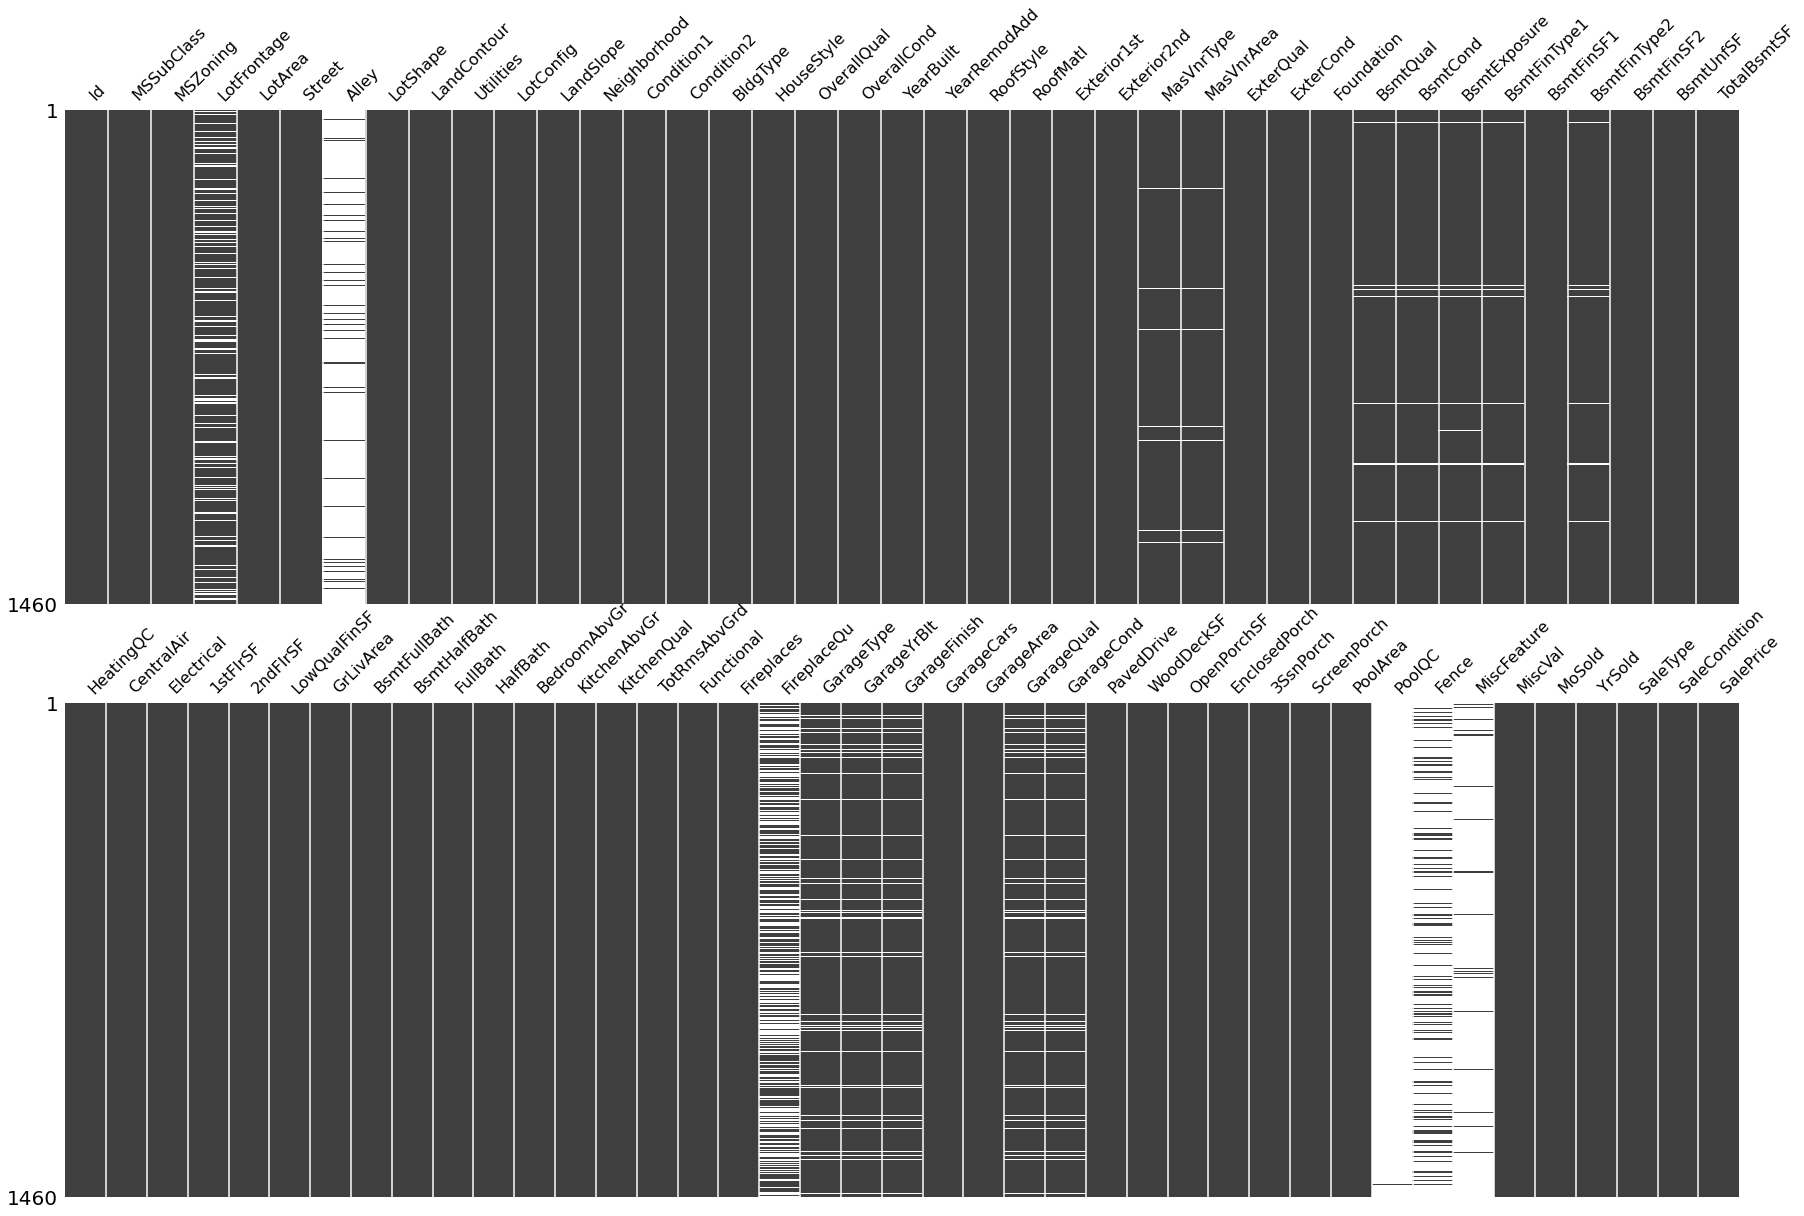

In [6]:
#全体像を見る
import missingno as msno
%matplotlib inline
#各特徴量の欠損値を可視化
flg, axs = plt.subplots(2, 1, figsize=(30, 20))

msno.matrix(df.iloc[:,0:39],sparkline=False, ax=axs[0])
msno.matrix(df.iloc[:,40:],sparkline=False, ax=axs[1])
plt.show()

ValueError: The number of FixedLocator locations (0), usually from a call to set_ticks, does not match the number of ticklabels (81).

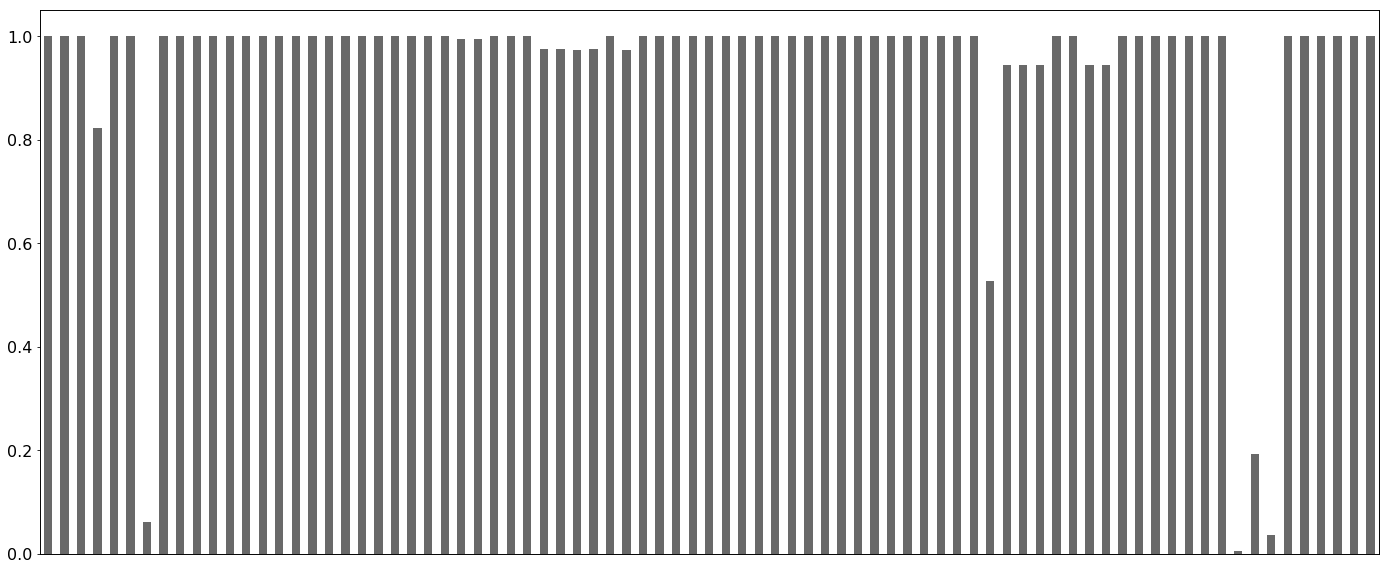

In [7]:
#各特徴量の欠損値の有無を確認する。
msno.bar(df)

In [ ]:
#欠損率順に並び変え
null_count = df.isnull().sum()
null_rate = null_count / len(df)

null_table = pd.DataFrame({
    'null_count': null_count,
    'null_rate': null_rate
})

null_table.sort_values(by='null_rate', ascending=False)

In [ ]:
# 欠損値が何パーセント含まれるかを確認する。
threshold = 0 #0以下の特徴量の値は表示しない
n_sample = len(df)
missing_percent = df.isnull().sum() / n_sample * 100
print("欠損率が{}%より高い特は徴量は\n{}".format(threshold,missing_percent[missing_percent>threshold]))

In [ ]:
#欠損値0より多い特徴量
threshold = 0
n_missing = df.isnull().sum()
print("欠損数が{}より多い特徴量は\n{}".format(threshold, n_missing[n_missing>threshold]))

In [ ]:
#5つ以上欠損値がある特徴量（列）は削除する。
df_edit = df.dropna(axis=0, thresh=len(df)-5)
df_edit.isnull().sum()

In [ ]:
#5つ以上欠損値がある特徴量を削除したデータから、欠損値があるサンプル（行）は削除する。
df_edit = df.dropna(axis=1, thresh=len(df)-5)
df_edit.isnull().sum()

次は目的変数がどのような分布を持っているか確認していきます。

## 【問題5】用語の調査
以下の２つの単語を知る必要があります。これらを調査してまとめてください。
・尖度    
・歪度  

### 解答

### 尖度

分布が正規分布からどれだけ尖っているかを表す統計量で、山の尖り度と裾の広がり度を示します。サンプルサイズをn、各データの平均値を、標準偏差をsとすると尖度は次の式から求められます。
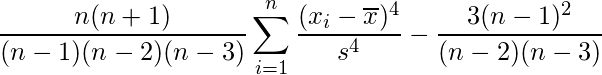
正規分布より尖った分布（データが平均付近に集中し、分布の裾が重い）のときには正の値を、正規分布より扁平な分布（データが平均付近から散らばり、分布の裾が軽い）のときには負の値をとります。正規分布の場合には0になります。

例えば、3-2章で用いた生徒の身長のデータ（一部改変）から尖度を算出すると次のようになります（※この図に示した尖度は、すべてのデータが階級値をとった場合の値です）。
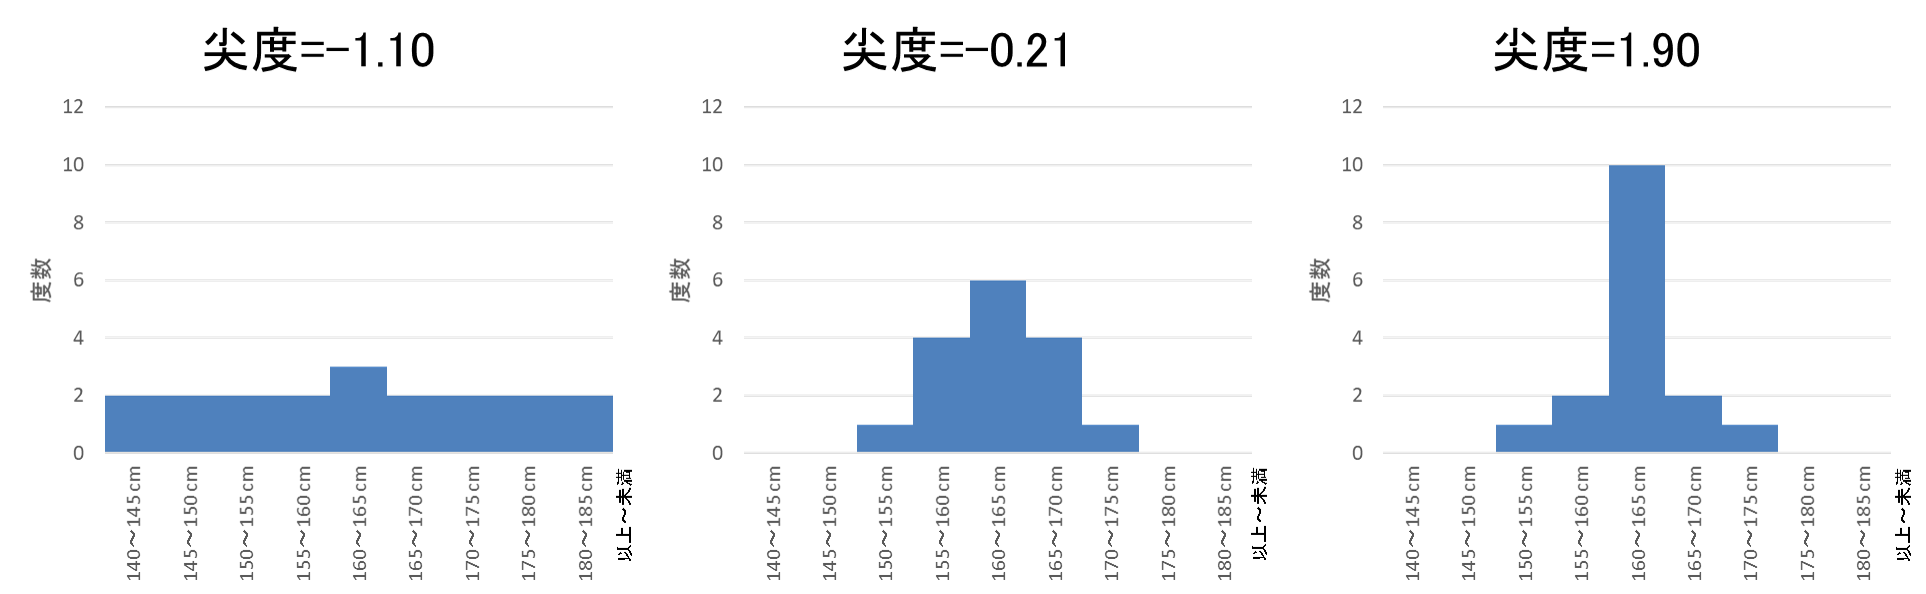


### 歪度
分布が正規分布からどれだけ歪んでいるかを表す統計量で、左右対称性を示す指標のことです。サンプルサイズをn、各データの平均値を、標準偏差をsとすると歪度は次の式から求められます。
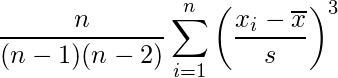
「右裾が長い」もしくは「右に歪んだ」もしくは「左に偏った」分布のときには正の値を、「左裾が長い」もしくは「左に歪んだ」もしくは「右に偏った」分布のときには負の値をとります。左右対称の分布（例えば正規分布）の場合には0になります。

例えば、3-2章で用いた生徒の身長のデータから歪度を算出すると次のようになります（※この図に示した歪度は、すべてのデータが階級値をとった場合の値です）。
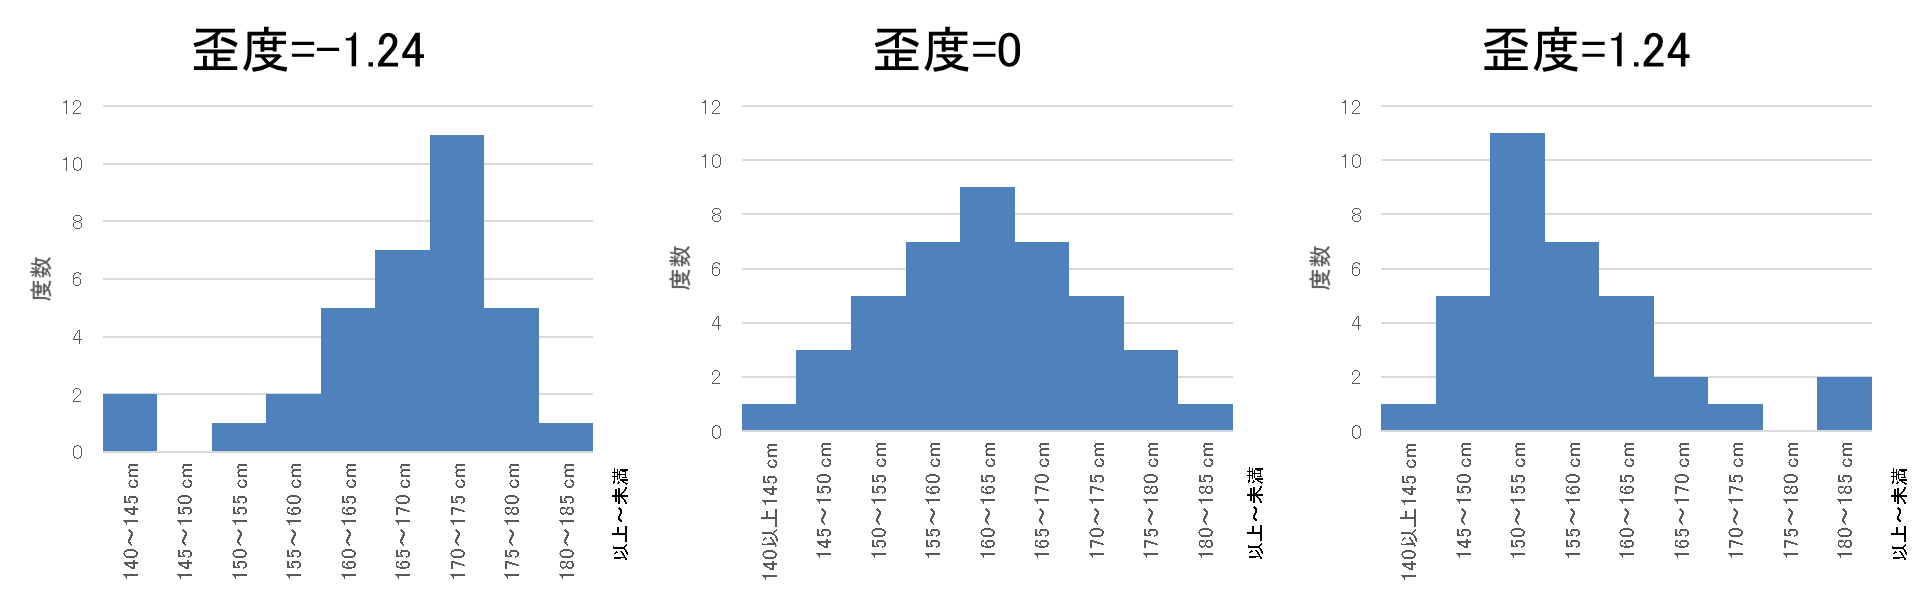

## 【問題6】分布の確認
・seabornのsns.displot()やsns.histplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。    
・目的変数に対して対数変換を行う。  
・対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。    

対数変換の前後での変化を「正規分布」という言葉を含めて説明してください。このように加工することで予測時の精度を上げることができます。
seaborn.displot — seaborn 0.11.1 documentation
seaborn.histplot — seaborn 0.11.1 documentation

In [ ]:
#seabornのsns.displot()やsns.histplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。
target = df["SalePrice"]
print("歪度={:.2f} 尖度={:.2f}".format(target.skew(),target.kurt()))
display(sns.displot(target, kde=False, rug=False,color="r", bins=10))

In [ ]:
#目的変数に対して対数変換を行う。
target_log = target.apply(np.log)

#対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。
print("歪度={:.2f} 尖度={:.2f}".format(target_log.skew(), target_log.kurt()))
display(sns.displot(target_log, kde=False, rug=False, bins=10))

### 対数変換の前後での変化を「正規分布」という言葉を含めて説明してください。

元のデータが尖度6.53から対数変数後、0.81になった。
分布が正規分布に近づいた。
対数変数すると正規分布に近づくことが多い。

## 【問題7】相関係数の確認
特徴量の確認をしていきます。それぞれに対してマークダウンで説明や考察を書いてください。

・相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。  
・目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。  
・選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。  
・選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。  

《補足》

重回帰分析などで予測する場合、相関が高すぎる特徴量の組み合わせがあると予測に悪影響が出ることがあります。このような場合の簡単な対処方法として、そういった特徴量の組みを探し出して、１つに絞るということがあります。

In [ ]:
#・相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。
df_corr = df.corr()

colormap = plt.cm.RdBu
plt.subplots(figsize=(15,12))
plt.title("chice_matrix")
sns.heatmap(df_corr,linewidth=0.1, vmax=1.0,
            square=True,cmap=colormap, linecolor="white", annot=False)
plt.show()

In [ ]:
#目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。
df_corr_saleprice = df_corr["SalePrice"].sort_values(ascending=False)
print(df_corr_saleprice[1:11])

In [ ]:
df_high_corr_saleprice = df[df_corr_saleprice[1:11].index]
display(df_high_corr_saleprice.head())

df_high_corr_saleprice_corr = df_high_corr_saleprice.corr()

colormap = plt.cm.RdBu
plt.subplots(figsize=(10,10))
plt.title("chice10_matrix")
sns.heatmap(df_high_corr_saleprice_corr,linewidth=0.1, vmax=1.0,
            square=True,cmap=colormap, linecolor="white", annot=False)
plt.show()

In [ ]:
#選んだ10個の特徴量が何か表しいるかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。
df_high_corr_saleprice_corr

OverallQual：総合素材と仕上がりの品質  
GrLivArea：地上（地上）のリビングエリアの平方フィート  
GarageCars：車の容量でのガレージのサイズ  
GarageArea：ガレージのサイズ（平方フィート）  
TotalBsmtSF：地下室の総平方フィート  
1stFlrSF：1階平方フィート  
FullBath：グレード以上のフルバスルーム  
TotRmsAbvGrd：グレード以上の部屋の合計（バスルームは含まれません）  
YearBuilt：元の建設日  
YearRemodAdd：改造日  

### 選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。

GarageAreaとGarageCars(0.882475)  
TotRmsAbvGrdとGrLivArea(0.825489)  
YearBuiltとTotRmsAbvGrd(0.095589)